In [15]:
import zipfile
with zipfile. ZipFile("seg_train.zip","r") as zip_ref:
     zip_ref. extractall("targetdir")
with zipfile. ZipFile("seg_test.zip","r") as zip_ref:
     zip_ref. extractall("targetdir")

In [25]:
import os
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras import Model
from os import getcwd
import sklearn
import random
import shutil
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing.image import ImageDataGenerator

In [17]:
import numpy as np
import matplotlib.pyplot as plt

In [32]:
data_dir = 'targetdir'

In [33]:
train_dir = os.path.join(data_dir, 'seg_train')
test_dir = os.path.join(data_dir, 'seg_test')

In [34]:
class_names = ['buildings', 'forest', 'glacier', 'mountain','sea','street']

In [35]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(150, 150, 3)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(6, activation='softmax')
])

In [36]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 67500)             0         
                                                                 
 dense_2 (Dense)             (None, 128)               8640128   
                                                                 
 dense_3 (Dense)             (None, 6)                 774       
                                                                 
Total params: 8,640,902
Trainable params: 8,640,902
Non-trainable params: 0
_________________________________________________________________


In [37]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [38]:
train_datagen = ImageDataGenerator(rescale = 1.0/255)

In [39]:
# NOTE: YOU MUST USE A BATCH SIZE OF 4 (batch_size=4) FOR THE 
# TRAIN GENERATOR.
train_generator = train_datagen.flow_from_directory(train_dir, 
                                                    batch_size = 4,
                                                    class_mode = 'binary', 
                                                    target_size = (150, 150))

Found 14034 images belonging to 6 classes.


In [41]:
validation_datagen = ImageDataGenerator(rescale = 1.0/255)

In [42]:
# NOTE: YOU MUST USE A BACTH SIZE OF 4 (batch_size=4) FOR THE 
# VALIDATION GENERATOR.
validation_generator = validation_datagen.flow_from_directory(test_dir, 
                                                              batch_size = 4,
                                                              class_mode = 'binary', 
                                                              target_size = (150, 150))

Found 3000 images belonging to 6 classes.


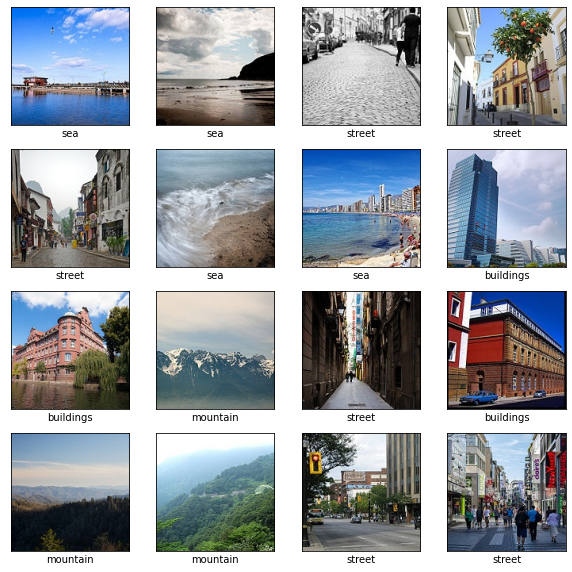

In [43]:
batch_size = 4
plt.figure(figsize=(10,10))
count = 0
images = []
labels = []

for i in range(4):
    x = train_generator[i]
    for j in range(batch_size):
      images.append(x[0][j])
      labels.append(int(x[1][j]))

images = np.array(images)
labels = np.array(labels)

for i in range(4*batch_size):
    plt.subplot(4,batch_size,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)

    plt.imshow(images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[labels[i]])
plt.show()

In [44]:
from tensorflow.keras.models import Sequential

num_classes = 6

model = Sequential([
  layers.experimental.preprocessing.Rescaling(1./255, input_shape=(150, 150, 3)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

In [45]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 150, 150, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 150, 150, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 75, 75, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 75, 75, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 37, 37, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 37, 37, 64)       

In [46]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [47]:
epochs = 10
history = model.fit(
  train_generator,
  validation_data=validation_generator,
  epochs=epochs
)

Epoch 1/10
3509/3509 [==============================] - 285s 81ms/step - loss: 1.7965 - accuracy: 0.1620 - val_loss: 1.7918 - val_accuracy: 0.1700
Epoch 2/10
3509/3509 [==============================] - 263s 75ms/step - loss: 1.7918 - accuracy: 0.1620 - val_loss: 1.7918 - val_accuracy: 0.1700
Epoch 3/10
3509/3509 [==============================] - 265s 75ms/step - loss: 1.7918 - accuracy: 0.1620 - val_loss: 1.7918 - val_accuracy: 0.1700
Epoch 4/10
3509/3509 [==============================] - 262s 75ms/step - loss: 1.7918 - accuracy: 0.1620 - val_loss: 1.7918 - val_accuracy: 0.1700
Epoch 5/10
3509/3509 [==============================] - 262s 75ms/step - loss: 1.7918 - accuracy: 0.1620 - val_loss: 1.7918 - val_accuracy: 0.1700
Epoch 6/10
3509/3509 [==============================] - 260s 74ms/step - loss: 1.7918 - accuracy: 0.1620 - val_loss: 1.7918 - val_accuracy: 0.1700
Epoch 7/10
3509/3509 [==============================] - 264s 75ms/step - loss: 1.7918 - accuracy: 0.1620 - val_loss: 1

In [48]:
import matplotlib.image  as mpimg
import matplotlib.pyplot as plt

In [49]:
acc=history.history['accuracy']
val_acc=history.history['val_accuracy']
loss=history.history['loss']
val_loss=history.history['val_loss']

epochs=range(len(acc)) # Get number of epochs

<Figure size 432x288 with 0 Axes>

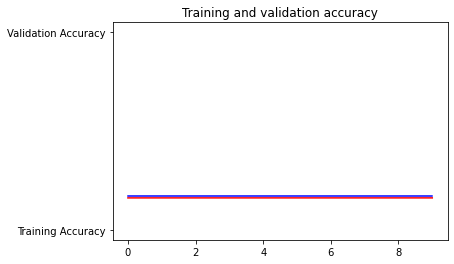

<Figure size 432x288 with 0 Axes>

In [50]:
plt.plot(epochs, acc, 'r', "Training Accuracy")
plt.plot(epochs, val_acc, 'b', "Validation Accuracy")
plt.title('Training and validation accuracy')
plt.figure()

Text(0.5, 1.0, 'Training and validation loss')

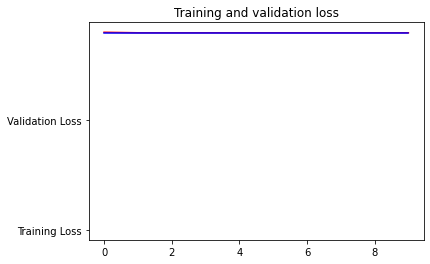

In [51]:
plt.plot(epochs, loss, 'r', "Training Loss")
plt.plot(epochs, val_loss, 'b', "Validation Loss")


plt.title('Training and validation loss')